# Многочлены

Библиотека NumPy предоставляет обширный набор классов для представления многочленов (полиномов), включающих методы для вычисления многочленов, для алгебры многочленов, для вычисления корней и подгонки к нескольким типам основных полиномиальных функций. В этом разделе сначала
рассматривается самый простой и наиболее известный основной объект – степенной ряд до перехода к обсуждению некоторых других канонических функций ортогонального полиномиального базиса.

## Определение и вычисление многочлена

Полиномиальный (конечный) степенной ряд в качестве базиса использует степени ```x: 1 (= x0
), x, x2, x3, …, xN``` с коэффициентами ```ci```:

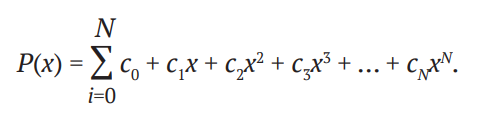

В этом разделе рассматривается использование обобщенного класса ```Polynomial```, который предоставляет удобный естественный интерфейс во внутренней функциональности пакета ```polynomial``` библиотеки NumPy.
Обобщенный класс многочлена ```numpy.polynomial.Polynomial```. Чтобы импортировать его напрямую, используйте инструкцию:

In [2]:
from numpy.polynomial import Polynomial

Или если вся библиотека NumPy уже импортирована как np, то вместо того,
чтобы часто обращаться к этому классу как ```np.polynomial.Polynomial```, удобнее
определить переменную:

In [3]:
import numpy as np

In [4]:
Polynomial = np.polynomial.Polynomial

Именно так мы будем ссылаться на класс ```Polynomial```.
Для определения объекта многочлена необходимо передать в конструктор
```Polynomial``` последовательность коэффициентов для постепенно возрастающих степеней ```x```, начиная с ```c0```
. Например, для представления многочлена

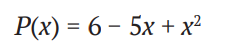

определяется объект

In [5]:
p = Polynomial([6, -5, 1])

Проверить коэффициенты объекта ```Polynomial``` можно командой ```print``` или
обращением к его атрибуту ```coef```.

In [6]:
print(p)

6.0 - 5.0 x**1 + 1.0 x**2


In [7]:
p.coef

array([ 6., -5.,  1.])

Обратите внимание: целочисленные коэффициенты, используемые для
определения многочлена, были автоматически преобразованы в  тип ```float```.
Также возможно использование комплексных коэффициентов.
Для вычисления многочлена при заданном значении x  необходимо «вызвать» многочлен, как показано ниже:

In [8]:
p(4) # Вычисление многочлена p при заданном одиночном значении x.

2.0

In [11]:
x = np.linspace(-5, 5, 11)

In [10]:
print(p(x)) # Вычисление p при заданной последовательности значений x.

[56. 42. 30. 20. 12.  6.  2.  0.  0.  2.  6.]


## Алгебра многочленов

В обобщенном классе ```Polynomial``` реализованы знакомые операторы Python:
```+, -, *,  //, **,  %``` и  ```divmod``` для объектов типа Polynomial. Использование этих
операторов показано в следующих примерах, работающих с многочленами

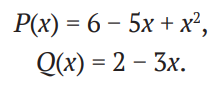

In [12]:
p = Polynomial([6, -5, 1])

In [13]:
q = Polynomial([2, -3])

In [14]:
print(p + q)

8.0 - 8.0 x**1 + 1.0 x**2


In [15]:
 print(p - q)

4.0 - 2.0 x**1 + 1.0 x**2


In [16]:
print(p * q)

12.0 - 28.0 x**1 + 17.0 x**2 - 3.0 x**3


In [17]:
print(p // q)

1.4444444444444444 - 0.3333333333333333 x**1


In [18]:
print(p % q)

3.1111111111111116


Деление многочлена на другой многочлен выполняется так же, как целочисленное деление (и используется тот же оператор //): т. е. результатом является третий многочлен (без обратных степеней x), возможно, с остатком от деления.
Таким образом, ```p = q(−1/3x + 13/9) + 28/9```,и оператор ```//``` возвращает многочленчастное ```−1/3x + 13/9```. Остаток (который в общем случае может быть еще одним
многочленом) возвращается,какможно былопредположить,операторомвзятия
модуля %. Встроенный метод ```divmod()``` возвращает частное и остаток в кортеже:

In [19]:
 quotient, remainder = divmod(p, q)

In [20]:
 print(quotient)

1.4444444444444444 - 0.3333333333333333 x**1


In [21]:
print(remainder)

3.1111111111111116


Возведение в степень поддерживается с помощью оператора ```**```, многочлены можно возводить только в неотрицательную целую степень:

In [23]:
print(q ** 2)

4.0 - 12.0 x**1 + 9.0 x**2


Не всегда удобно создавать новый объект многочлена, чтобы воспользоваться этими операторами совместно с другим многочленом, поэтому многие из операторов, описанных выше, также работают со скалярными значениями:

In [24]:
print(p * 2) # Умножение на скаляр.

12.0 - 10.0 x**1 + 2.0 x**2


In [25]:
print(p / 2) # Деление на скаляр.

3.0 - 2.5 x**1 + 0.5 x**2


и даже с  кортежами, списками и  массивами коэффициентов многочлена.
Например, для умножения многочлена ```P(x)``` на ```x2 − 2x3```:

In [26]:
print(p * [0, 0, 1, -2])

0.0 + 0.0 x**1 + 6.0 x**2 - 17.0 x**3 + 11.0 x**4 - 2.0 x**5


Один многочлен можно подставить в другой.Для вычисления ```P(Q(x))``` просто
используется выражение ```p(q)```:

In [27]:
print(p(q))

0.0 + 3.0 x**1 + 9.0 x**2


Таким образом, ```P(Q(x)) = 3x + 9x2```.

## Поиск корней многочлена

Корни многочлена возвращает метод ```roots```. Одинаковые корни просто повторяются в возвращаемом массиве:

In [28]:
 p.roots()

array([2., 3.])

In [29]:
(q * q).roots()

array([0.66666667, 0.66666667])

In [30]:
Polynomial([5, 4, 1]).roots()

array([-2.-1.j, -2.+1.j])

Многочлены можно также создавать по их корням с помощью метода ```Polynomial.fromroots```:

In [31]:
print( Polynomial.fromroots([-4, 2, 1]) )

8.0 - 10.0 x**1 + 1.0 x**2 + 1.0 x**3


То есть ```(x + 4)(x − 2)(x − 1) = 8 − 10x + x2 + x3```. Обратите внимание: при таком
способе формирования многочлена коэффициент при наивысшей степени ```x``` всегда будет равен 1.

**Пример**. Емкости для хранения криогенных жидкостей и ракетного топлива
часто имеют сферическую форму (почему?). Предположим, что конкретная сферическая емкость имеет радиус ```R``` и заполняется жидкостью до высоты ```h```. Формула объема
жидкости по высоте заполнения выводится (относительно) просто:


V = πRh2 − 1/3πh3

Предположим, что из этой емкости постоянно вытекает жидкость со скоростью потока ```F = −dV/dt```. Как изменяется во времени высота заполнения жидкости ```h```? Дифференцирование приведенного выше равенства по переменной времени ```t``` приводит к следующему результату:

(2πRh − πh2)dh/dt = −F.

Если начать с заполненной емкости (h = 2R) в момент времени t = 0, то это
обыкновенное дифференциальное уравнение можно проинтегрировать и получить следующее выражение:

−1/3πh3 + πRh2 + (Ft − 4/3πR3) = 0,

т. е. кубический многочлен с переменной ```h```. Поскольку это уравнение невозможно аналитически преобразовать относительно ```h```, воспользуемся NumPy
классом ```Polynomial``` для поиска ```h(t)```, приняв радиус емкости ```R``` = 1.5 м и скорость вытекания жидкости 200 см3/с.
Общий объем жидкости в полной емкости равен ```V0 = 4/3πR3```. Очевидно, что
емкость пуста, когда ```h = 0```, что происходит в момент времени ```T = V0/F```, так как
скорость потока постоянная. В  любой произвольно взятый момент времени ```t``` можно вычислить ```h```, определив корни приведенного выше уравнения.

**Листинг 1**. Определение высоты жидкости в сферической емкости

C:\Users\user\AppData\Local\Temp\ipykernel_10332\3248412164.py:27: ComplexWarning: Casting complex values to real discards the imaginary part
  h[i] = roots[(0 <= roots) & (roots <= 2*R)][0]


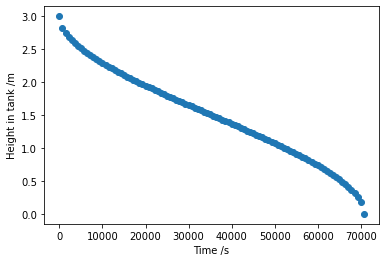

In [33]:
# eg6-c-spherical -tank -a.py
import numpy as np
import matplotlib.pyplot as plt
Polynomial = np.polynomial.Polynomial
# Радиус сферической емкости в м.
R = 1.5
# Скорость вытекания жидкости из емкости в м^3/с.
F = 2.e-4
# Общий объем емкости.
V0 = 4/3 * np.pi * R**3
# Общее время, за которое емкость становится пустой.
T = V0 / F
# Коэффициенты для членов в квадрате и в кубе, содержащихся
# в p(h) - многочлене, который необходимо решить относительно h.
c2, c3 = np.pi * R, -np.pi / 3
N = 100
# Массив из N меток времени от 0 до T включительно.
time = np.linspace(0, T, N) # Создается массив меток времени от t = 0 до t = T
# Создание соответствующего массива значений высоты h(t).
h = np.zeros(N)
for i, t in enumerate(time):
    c0 = F*t - V0
    p = Polynomial([c0, 0, c2, c3])
    # Вычисление трех корней этого многочлена.
    roots = p.roots()
 # Требуется один корень, для которого 0 <= h <= 2R.
    h[i] = roots[(0 <= roots) & (roots <= 2*R)][0]

plt.plot(time , h, 'o')
plt.xlabel('Time /s')
plt.ylabel('Height in tank /m')
plt.show()

Для каждой метки времени вычисляются корни приведенного выше
кубического многочлена. Только один из корней имеет физический
смысл, а именно: 0 ≤ h ≤ 2R (высота уровня жидкости не может быть отрицательной или большей диаметра емкости), этот корень извлекается
(с помощью логического индексирования) и сохраняется в массиве h.

На завершающем этапе изображается изменение ```h``` как функции от времени
(см. рис. 1).

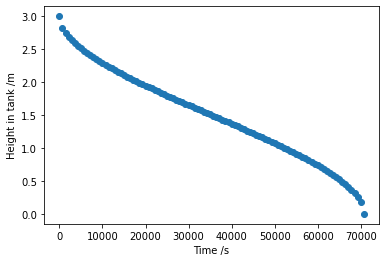

Рис. 1. Высота уровня жидкости как функция от времени
```h(t)``` для задачи о сферической емкости

# Математический анализ

Многочлены можно дифференцировать с помощью метода ```Polynomial.deriv```.
По умолчанию этот метод возвращает первую производную, но в необязательном аргументе ```m``` можно определить возврат ```m```-й производной:

In [35]:
p = Polynomial([6, -5, 1])
print(p)

6.0 - 5.0 x**1 + 1.0 x**2


In [36]:
print(p.deriv())

-5.0 + 2.0 x**1


In [37]:
print(p.deriv(2))

2.0


Объект ```Polynomial``` можно также интегрировать с  необязательной нижней
границей ```L``` и постоянной интегрирования ```k```, интерпретируемой, как показано
в следующем примере:

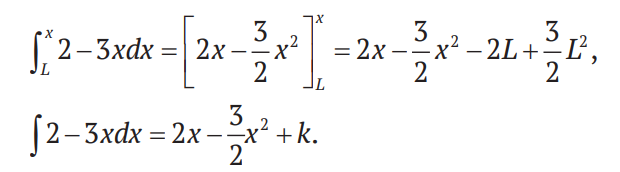

По умолчанию ```L``` и ```k``` равны нулю, но их значения можно определить, передавая в аргументах ```lbnd``` и ```k``` в метод ```Polynomial.integ```:

In [38]:
q = Polynomial([2, -3])
print(q)

2.0 - 3.0 x**1


In [39]:
print(q.integ())

0.0 + 2.0 x**1 - 1.5 x**2


In [40]:
print(q.integ(lbnd=1))

-0.5 + 2.0 x**1 - 1.5 x**2


In [41]:
print(q.integ(k=2))

2.0 + 2.0 x**1 - 1.5 x**2


Многочлены можно интегрировать многократно, передавая значение в аргументе ```m``` – количество требуемых операций интегрирования.

## Классические ортогональные многочлены

В дополнение к  классу ```Polynomial```, представляющему простые степенные ряды, такие как ```a0 + a1x + a2x2 + … + anxn```, библиотека NumPy предлагает классы для представления рядов, сформированных из любых классических ортогональных многочленов. Эти многочлены и  их линейные комбинации широко используются в  физике, статистике и  математике. В  текущей версии NumPy 1.17 представлены обобщенные классы многочленов: Chebyshev,
Legendre, Laguerre, Hermite («версия для физиков») и HertmiteE («версия для
вероятностных вычислений»). Есть много хороших книг, подробно описывающих свойства этих классов многочленов. Чтобы продемонстрировать их
практическое использование, сосредоточимся на многочленах Лежандра, обозначаемых как ```Pn(x)```. Они представляют собой решения дифференциального уравнения Лежандра:

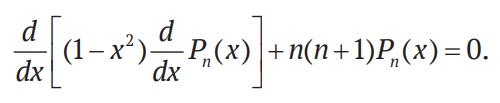

Ниже приведено несколько первых многочленов Лежандра:

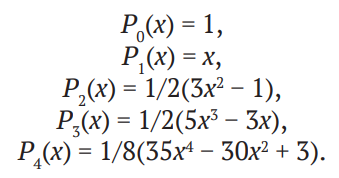

Графики этих многочленов изображены на рис. 2.

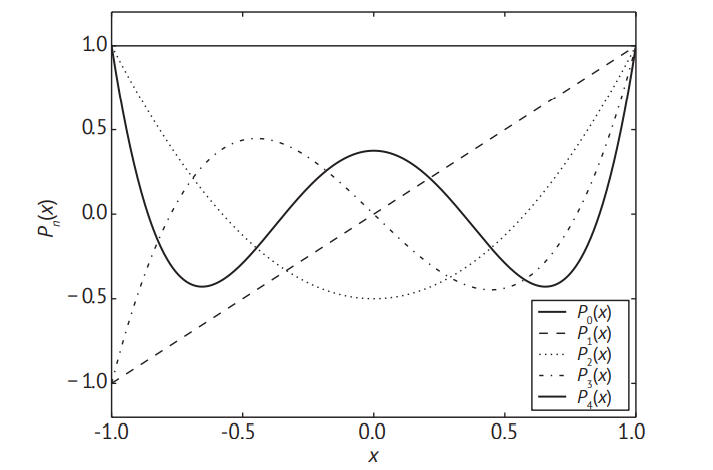

**Рис. 2**. Пять первых многочленов Лежандра Pn(x) при n = 0, 1, 2, 3, 4

Полезным свойством многочленов Лежандра является их ортогональность
на интервале [−1, 1]:

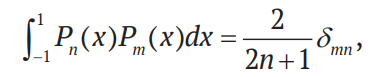

которая важна при их использовании в  качестве основы для представления близко соответствующих функций.
Для создания линейной комбинации многочленов Лежандра коэффициенты передаются в конструктор класса Legendre точно так же, как и в конструктор ```Polynomial```. Например, для создания разложения 5P1(x) + 2P2(x):

In [43]:
Legendre = np.polynomial.Legendre

In [44]:
 A = Legendre([0, 5, 2])

Существующий объект многочлена можно преобразовать в  ряд Лежандра
с помощью метода ```cast```:

In [45]:
 P = Polynomial([0, 1, 1])

In [46]:
Q = Legendre.cast(P)

In [47]:
 print(Q)

0.3333333333333333 + 1.0 P_1(x) + 0.6666666666666666 P_2(x)


То есть ```x + x2 = 1/3P0 + P1 + 2/3P2```.

Экземпляр одной базисной функции многочлена Лежандра можно создать,
используя метод ```basis```:

In [48]:
L3 = Legendre.basis(3)

Здесь создается объект, представляющий ```P3(x)```. Это равнозначно вызову ```Legendre([0, 0, 0, 1])```. Для получения обычного степенного ряда можно выполнить обратное преобразование в объект ```Polynomial```:

In [49]:
print(Polynomial.cast(L3))

0.0 - 1.5 x**1 + 0.0 x**2 + 2.5 x**3


В дополнение к  описанным выше функциям объекта ```Polynomial```, включая
методы дифференцирования и  интегрирования многочленов, обобщенные
классы для классических ортогональных многочленов предлагают несколько
полезных методов.
Метод ```convert``` выполняет преобразование между различными типами многочленов. Например, линейная комбинация ```A(x) = 5P1(x) + 2P2(x) = 5x + 2½(3x2 −1) = −1 + 5x + 3x2``` как степенной ряд одночленов (ряд Маклорена) представляется экземпляром класса ```Polynomial``` в следующем виде:

In [50]:
A = Legendre([0, 5, 2])

In [51]:
B = A.convert(kind=Polynomial)

In [52]:
print(B)

-1.0 + 5.0 x**1 + 3.0 x**2


Так как объекты ```A``` и ```B``` представляют одну и ту же базисную функцию (просто
она разложена на различные базисные множества), при вычислении они дают
одинаковое значение при одинаковом заданном ```x``` и имеют одинаковые корни:

In [53]:
 A(-2) == B(-2)

True

In [54]:
 print(A.roots(), B.roots(), sep='\n')

[-1.84712709  0.18046042]
[-1.84712709  0.18046042]


## Подгонка к многочленам

Широко распространенное практическое применение разложений на многочлены  – подгонка и  аппроксимация последовательностей данных. Модули
многочленов библиотеки NumPy предоставляют методы для подгонки методом наименьших квадратов для функций. В  этом разделе рассматривается функция ```fit``` обобщенных классов многочленов.

## Атрибуты domain и window

В обычной одномерной задаче подгонки требуется многочлен, наилучшим образом соответствующий конечной непрерывной функции на некотором конечном интервале оси ```x``` (называемом доменом – ```domain```). Но сами многочлены могут существенно отличаться друг от друга и расходиться при ```x → ±∞```. Поэтому существует риск при любой попытке вслепую применить подгонку методом наименьших квадратов непосредственно в области определения функции: подгоняемый многочлен часто становится причиной нестабильности вычислений,
переполнения, потери значимости и прочих типов некорректности и плохой
обусловленности (см. раздел "Стабильность и обусловленность алгоритмов"). В качестве примера рассмотрим функцию

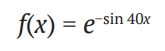

на интервале (100, 100.1). В этой функции нет ничего особенного: ее поведение
хорошо известно на всей области определения, и ```f(x)``` принимает вполне предсказуемые значения в интервале от ```e–1``` до ```e1```. Тем не менее прямая подгонка методом наименьших квадратов к многочлену четвертого порядка в указанном интервале (домене) дает следующий результат:

−11.881851 + 2379.22228x − 119.741202x2 − 23828009.7x3 + 1192894610x4

который очевидно является потенциальным источником вычислительной нестабильности и потери точности даже при обычных значениях ```x```: эта аппроксимация ```f(x)``` формируется из разностей весьма больших одночленов.
Каждый класс многочлена по умолчанию имеет окно (window), представляющее оптимальный интервал для формирования линейной комбинации при подгонке функции. Например, окном многочленов Лежандра является интервал ```[−1, 1]```, на котором строились графики в предыдущем разделе и в котором ```Pn(x)``` ортогональны и ```|Pn(x) < 1|```. Проблема заключается в том, что подгоняемая функция не соответствует окну выбранного многочлена. Следовательно, необходимо привести в соответствие область определения функции и окна многочлена.
Это делается с помощью сдвига и масштабирования по оси ```x```: т. е. посредством
отображения точек из области определения функции в  точки, находящиеся
в окне подгоняемого многочлена. Функция многочлена ```fit``` делает это автоматически,так что для упомянутой выше функции подгонка методом наименьших
квадратов к многочлену четвертой степени дает следующий результат:

In [55]:
x = np.linspace(100, 100.1, 1001)

In [56]:
f = lambda x: np.exp(-np.sin(40*x))

In [57]:
p = Polynomial.fit(x, f(x), 4)

In [58]:
 print(p)

1.494225511376009 - 2.546414491999939 x**1 + 0.632846406226221 x**2 +
1.8424646262661921 x**3 - 1.028219562386352 x**4


Домен и окно многочлена можно проверить, обратившись к атрибутам ```domain``` и ```window``` соответственно:

In [59]:
 p.domain

array([100. , 100.1])

In [60]:
p.window

array([-1.,  1.])

Важно отметить, что аргумент ```x``` отображается из домена в окно всегда при
вычислении многочлена. Это означает, что два многочлена с различными доменами и/или окнами при вычислении могут давать различные значения, даже если их коэффициенты одинаковы. Например, если заново создается объект ```Polynomial``` с теми же коэффициентами, что и подогнанный многочлен ```p``` в примере, приведенном выше:

In [62]:
q = Polynomial ([1.49422551, -2.54641449, 0.63284641,1.84246463, -1.02821956])

то новый многочлен имеет домен и окно, определенные по умолчанию, т.  е.
оба (-1, 1):

In [63]:
print(q.domain , q.window)

[-1  1] [-1  1]


поэтому вычисление многочлена ```q```, например, в точке 100.05 отображает точку 100.05 в домене в точку 100.05 в окне и дает совершенно другой результат
при вычислении ```p``` в той же точке его домена (которая отображается в точку 0.
окна):

In [64]:
q(100.05), p(100.05)

(-101176442.96772559, 1.494225511376009)

Легко показать, что функция отображения ```x``` в домене ```(a,b)``` в ```x’``` в окне ```(a’,b’)``` имеет следующий вид:

x’ = m(x) = χ + μx, где μ = (b’ − a’)/(b − a), χ = b’ − b(b’ − a’)/(b − a).

Это параметры, возвращаемые функцией многочлена ```mapparams```:

In [65]:
chi, mu = p.mapparms()

In [66]:
print(chi, mu)

-2001.0000000001137 20.000000000001137


Таким образом:

print(q(chi + mu*100.05))

Значения атрибутов ```domain``` и ```window``` можно изменить прямым присваиванием:

In [69]:
q.domain = np.array((100., 100.1))

In [70]:
print(q(100.05))

1.49422551


Для вычисления многочлена с набором чисел, равномерно распределенных
по точкам в  его домене, например для построения графика многочлена, используется метод класса ```Polynomial``` ```linspace```:

In [71]:
p.linspace(5)

(array([100.   , 100.025, 100.05 , 100.075, 100.1  ]),
 array([1.80280222, 2.63107256, 1.49422551, 0.54527422, 0.39490249]))

Метод ```p.linspace``` возвращает два массива с  заданным количеством точек
в домене многочлена, представляющих точки ```x```, и со значениями многочлена,
вычисленными в этих точках ```p(x)```.

## Метод Polynomial.fit

Метод класса ```Polynomial fit``` возвращаетмного член,подогнанный методом наименьших квадратов, ```y``` к данным из выборки значений ```x```. В самом простом варианте использования для метода ```fit``` требуется передача только объектов типа
массив ```x``` и ```y``` и значения ```deg``` – степени подгоняемого многочлена. Метод возвращает многочлен, который минимизирует сумму квадратических ошибок:

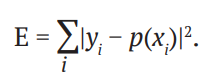

Например:

In [72]:
x = np.linspace(400, 700, 1000)

In [73]:
y = 1 / x**4

In [74]:
p = Polynomial.fit(x, y, 3)

создает кубический многочлен, подогнанный наилучшим образом к функции
```x-4``` на интервале ```[400, 700]```.

Взвешенная подгонка методом наименьших квадратов определяется передачей в  аргументе w  последовательности взвешенных значений, имеющей длину, равную длине массивов ```x``` и ```y```. Возвращается многочлен, минимизирующий сумму взвешенных квадратических ошибок:

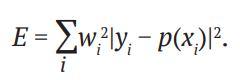

Домен и  окно подгоняемого многочлена можно определить в  аргументах ```domain``` и ```window```, по умолчанию минимальный домен включает все используемые точки ```x```.
Разумным действием является проверка качества подгонки перед использованием возвращенного многочлена.Установка аргумента ```full=True``` заставляет ```fit``` возвращать два объекта: подогнанный многочлен и список различных статистических данных о самой операции подгонки:

In [75]:
deg = 3

In [76]:
 p, [resid , rank , sing_val , rcond] = Polynomial.fit(x, y, deg, full=True)

In [77]:
 p

Polynomial([ 1.07041864e-11, -1.16488662e-11,  1.02545751e-11, -5.64068914e-12], domain=[400., 700.], window=[-1.,  1.])

In [78]:
resid

array([4.57180972e-23])

In [79]:
rank

4

In [80]:
sing_val

array([1.3843828 , 1.32111941, 0.50462215, 0.28893641])

In [81]:
rcond

2.220446049250313e-13

Этот список можно проанализировать, чтобы узнать, насколько точно функция-многочлен соответствует исходным данным. Значение ```resid``` – это сумма квадратов разностей:

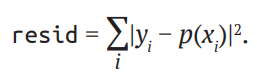

Здесь меньшее значение ```resid``` означает более точную подгонку. Значения
```rank``` и ```sing_val``` – это ранг и сингулярные значения матрицы, инвертированной
в  алгоритме наименьших квадратов для поиска коэффициентов многочлена:
плохая обусловленность этой матрицы может привести к весьма неточной подгонке (особенно если степень подгоняемого многочлена слишком высока). Значение ```rcond``` – это коэффициент выравнивания (отсечения) для малых отдельных значений в этой матрице: значения, меньшие этого коэффициента, устанавливаются в ноль в процессе подгонки (для защиты от ложных артефактов, возникающих при ошибке округления), и генерируется исключение ```RankWarning```. Если это происходит, то, возможно, данные слишком загрязнены (в них весьма высок уровень шума) или не точно описываются многочленом заданной степени.
Следует отметить, что подгонка методом наименьших квадратов должна всегда
выполняться с двойной точностью, а кроме того, следует помнить о переподгонке данных (попытке установить соответствие с функцией со слишком большим
количеством коэффициентов, т. е. с многочленом слишком высокого порядка).

**Пример 3**. Прямолинейная наилучшая подгонка – это просто особый случай
полиномиальной подгонки методом наименьших квадратов (при ```deg```=1). Рассмотрим
следующие данные, полученные при поглощении (абсорбции) ```A``` на пути длиной 5 мм,
который проходит ультрафиолетовый свет с  длиной волны  280 нм, протеином,
как функцию от концентрации ```[P]```:

**Таблица 1**

|[P], мкг/мл|A|
|:---|:-----|
|0|2.287|
|20 |3.528|
|40|4.336|
|120|8.274|
|180|12.855|
|260|16.085|
|400|24.797|
|800|49.058|
|150|89.400|

Предполагается, что поглощение линейно связано с концентрацией протеина: ```A = m[P] + A0```, где ```A0``` – поглощение при отсутствии протеина (например, изза раствора и экспериментальных компонентов).

**Листинг 1**. Прямолинейная подгонка данных о поглощении

Raw fit results:
1.928961285204283 + 0.058305702102340325 x**1
[array([2.47932733]), 2, array([1.26633786, 0.62959385]), 2.220446049250313e-15]
Fit: A = 0.058[P] + 1.929 (rms residual = 0.4979)


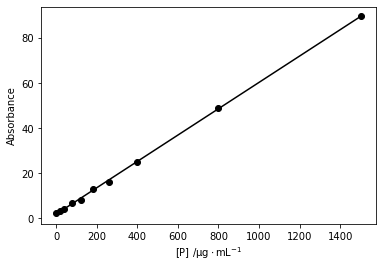

In [6]:
# eg6-polyfit.py
import numpy as np
import matplotlib.pyplot as plt
Polynomial = np.polynomial.Polynomial
# Данные: концентрация conc = [P] и поглощение A.
conc = np.array([0, 20, 40, 80, 120, 180, 260, 400, 800, 1500])
A = np.array([2.287, 3.528, 4.336, 6.909, 8.274, 12.855, 16.085, 24.797,
 49.058, 89.400])
cmin, cmax = min(conc), max(conc)
pfit, stats = Polynomial.fit(conc, A, 1, full=True, window=(cmin , cmax), domain=(cmin , cmax))
print('Raw fit results:', pfit , stats , sep='\n')
A0, m = pfit
resid, rank, sing_val, rcond = stats
rms = np.sqrt(resid[0]/len(A))
print('Fit: A = {:.3f}[P] + {:.3f}'.format(m, A0),
 '(rms residual = {:.4f})'.format(rms))
plt.plot(conc, A, 'o', color='k')
plt.plot(conc, pfit(conc), color='k')
plt.xlabel('[P] /$\mathrm{\mu g\cdot mL^{-1}}$')
plt.ylabel('Absorbance')
plt.show()

Вывод этой программы показывает качественную прямолинейную подгонку для исходных данных

# Упражнения

## Вопросы

**В 1**. Третья производная от функции многочлена ```P(x) = 3x3 + 2x − 7``` равна ```18```,
но почему приведенное ниже вычисление дает результат False?

In [7]:
Polynomial((-7, 2, 0, 3)).deriv(3) == 18

False

**В 2**. Найти и классифицировать критические точки многочлена

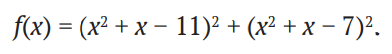

In [11]:
p1 = Polynomial([-11,1,1])
p2 = Polynomial([-7,1,1])
p = p1**2 + p2**2

dp = p.deriv()
stationary_points = dp.roots()

ddp = dp.deriv()

minima = stationary_points[ddp(stationary_points) > 0]
maxima = stationary_points[ddp(stationary_points) < 0]

inflections = stationary_points[np.isclose(ddp(stationary_points),0)]

print(np.array((minima, p(minima))).T)

print(np.array((maxima, p(maxima))).T)

print(np.array((inflections, p(inflections))).T)

[[-3.54138127  8.        ]
 [ 2.54138127  8.        ]]
[[ -0.5   179.125]]
[]
